In [1]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import copy

In [2]:
method_dict = {"random sample": "Random Sample", "surr ensemble": "ASE", "ASE_true_loss": "True Loss"}
metric_dict = {'loss': 'Average Loss'}
def add_entries(file, acq_type = None):
    #columns=['active_test_type','sample_size','loss','mAP',"AP_50", "AP_75", "mAP_samll", "mAP_medium", "mAP_large", "mAR_1", "mAR_10", "mAR_1000", "mAR_small", "mAR_medium", "mAR_large"]
    with open(file, 'r') as openfile:
        json_object = json.load(openfile)
    df = None
    for key,value in json_object.items():
        if 'test_stats' in value.keys():
            del value['test_stats']
        value['active_test_type'] = method_dict[value['active_test_type']]
        if acq_type is not None:
            value['active_test_type'] = value['active_test_type'] + '-' + acq_type
        temp_df = pd.DataFrame(value, index=[key])
        if df is None:
            df = temp_df
        else:
            df = df.append(temp_df,ignore_index=True)
    return df

In [20]:
def plot_figure(data, baseline_data, y_metric):
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.plot([data['sample_size'][0], data['sample_size'][len(data['sample_size'])-1]], [baseline_data[y_metric], baseline_data[y_metric]], lw=3, label="Whole Data Set")
    plt.title("Active Testing", fontsize=30)
    plt.xlabel('# of Acquired Images',fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric], fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()
    
def plot_diff_precentage_figure(input_data, baseline_data, y_metric):
    data = copy.deepcopy(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel('# of Acquired Images',fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " Diff %", fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()
    
def plot_diff_precentage_figure_comp(input_data, baseline_data, y_metric):
    data = copy.deepcopy(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel('# of Acquired Images',fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " Diff %", fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

def read_baseline_data(data_path):
    with open(data_path, 'r') as openfile:
        none_swin_data = json.load(openfile)
    return none_swin_data["0"]

def plot_all_diff_precentage_figure(input_data, baseline_data, sample_nums, y_metric, x_label_name = "% of Acquired Images"):
    data = copy.deepcopy(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric] * 100
    data['sample_size'] = data['sample_size'] / sample_nums * 100
    with sns.axes_style("darkgrid"):
        palette = sns.color_palette("Set2")
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3, palette=palette)
        
    x_line = [data['sample_size'][0], data['sample_size'][data['sample_size'].shape[0]-1]]
    y_line = [0, 0]
    plt.plot(x_line, y_line, 'r')
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel("% Difference Rate to Full Test " + metric_dict[y_metric], fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()

In [21]:
# surrogate ensemble loss summary type: min
result_json_path = "./results/ASE_loss_compare/"
true_loss_estimation_path = result_json_path + "None_R50_31.json"
random_sample_path = result_json_path + "random_sample_R50_31_10_runs.json"
surr_ensemble_path_min = result_json_path + "surr_ensemble_R50_31_10_runs_min.json"
surr_ensemble_path_max = result_json_path + "surr_ensemble_R50_31_10_runs_max.json"
surr_ensemble_path_mean = result_json_path + "surr_ensemble_R50_31_10_runs_mean.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(random_sample_path)
results = results.append(add_entries(surr_ensemble_path_mean, None),ignore_index=True)
true_loss_results = add_entries(result_json_path + "true_loss_R50_31_10_runs.json", "With LURE")
true_loss_results['loss'] = true_loss_results['loss'] - true_loss_results['loss'][true_loss_results['loss'].shape[0]-1] + test_whole_data['loss']
results = results.append(true_loss_results, ignore_index=True)
results = results.append(add_entries(result_json_path + "true_loss_no_weight_R50_31_10_runs.json", "Without LURE"),ignore_index=True)
# results = results.append(add_entries(result_json_path + "true_loss_random_sample_R50_31_10_runs.json", "Random Sample"),ignore_index=True)
# results = results.append(add_entries(result_json_path + "true_loss_random_sample_all_R50_31_10_runs.json", "Random Sample All"),ignore_index=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.


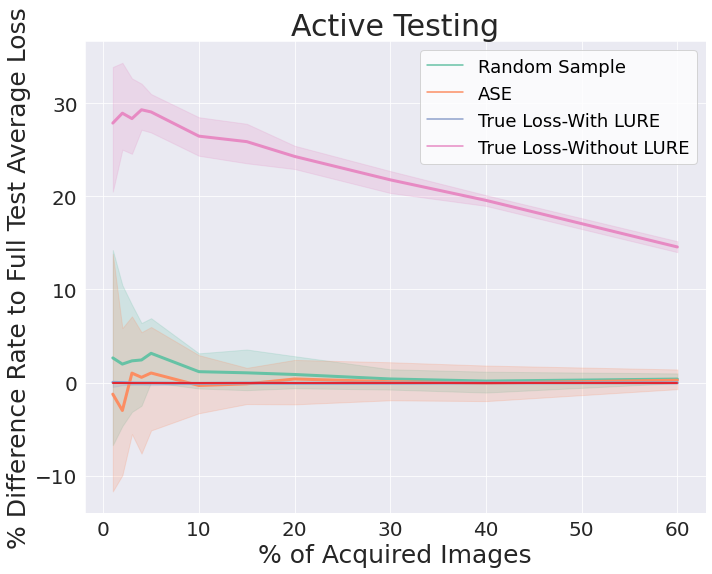

In [22]:
plot_all_diff_precentage_figure(results, test_whole_data, 5000, "loss")

In [13]:
# surrogate ensemble loss summary type: min
result_json_path = "./results/ASE_loss_compare/"
true_loss_estimation_path = result_json_path + "None_R50_31.json"
random_sample_path = result_json_path + "random_sample_R50_31_10_runs.json"
surr_ensemble_path_min = result_json_path + "surr_ensemble_R50_31_10_runs_min.json"
surr_ensemble_path_max = result_json_path + "surr_ensemble_R50_31_10_runs_max.json"
surr_ensemble_path_mean = result_json_path + "surr_ensemble_R50_31_10_runs_mean.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(random_sample_path)
results = results.append(add_entries(surr_ensemble_path_min, "min"),ignore_index=True)
results = results.append(add_entries(surr_ensemble_path_max, "max"),ignore_index=True)
results = results.append(add_entries(surr_ensemble_path_mean, "mean"),ignore_index=True)
results = results.append(add_entries(result_json_path + "true_loss_R50_31_10_runs.json", None),ignore_index=True)
results = results.append(add_entries(result_json_path + "true_loss_no_weight_R50_31_10_runs.json", "Without LURE"),ignore_index=True)
results = results.append(add_entries(result_json_path + "true_loss_random_sample_R50_31_10_runs.json", "Random Sample"),ignore_index=True)
results = results.append(add_entries(result_json_path + "true_loss_random_sample_all_R50_31_10_runs.json", "Random Sample All"),ignore_index=True)

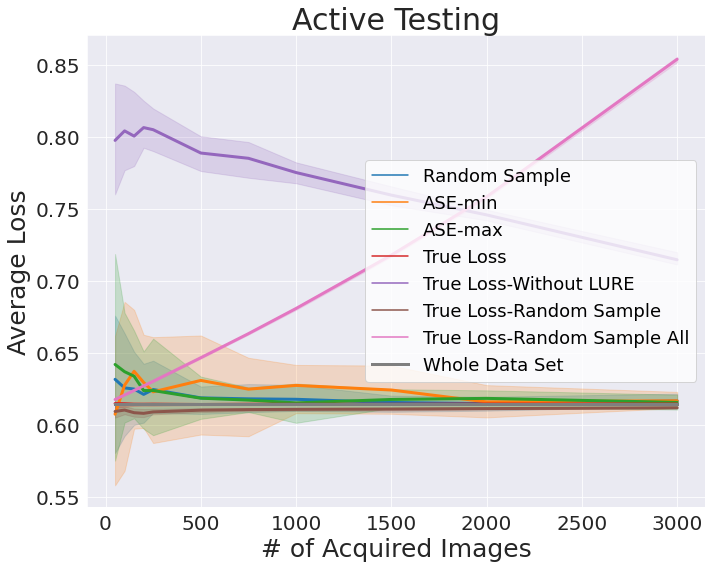

In [14]:
plot_figure(results, test_whole_data, "loss")

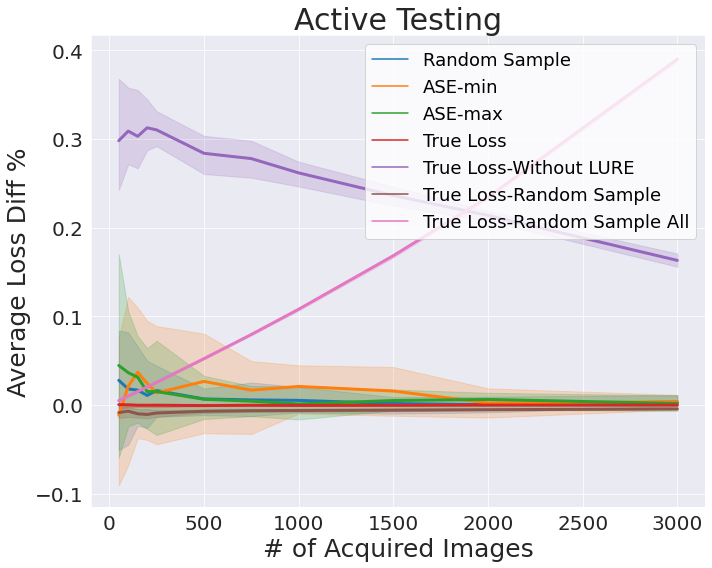

In [15]:
plot_diff_precentage_figure_comp(results, test_whole_data, "loss")